<a href="https://colab.research.google.com/github/atiqueshaikh92/Heart-disease-/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
Path_dis = ('/content/drive/MyDrive/HeartDisease.csv')

In [34]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

import warnings

warnings.filterwarnings("ignore")


import random
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import tree

In [4]:
import pandas as pd

# Load the dataset
heart_df = pd.read_csv(Path_dis)

# Display the first few rows
heart_df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Check shape and summary statistics
print("Shape of the dataset:", heart_df.shape)
print("\nSummary statistics:\n", heart_df.describe())

# Check for missing values
print("\nMissing values:\n", heart_df.isnull().sum())

Shape of the dataset: (303, 14)

Summary statistics:
               age      gender  chest_pain    rest_bps  cholestrol  \
count  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026   
std      9.082101    0.466011    1.032052   17.538143   51.830751   
min     29.000000    0.000000    0.000000   94.000000  126.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000   
max     77.000000    1.000000    3.000000  200.000000  564.000000   

       fasting_blood_sugar    rest_ecg     thalach  exer_angina    old_peak  \
count           303.000000  303.000000  303.000000   303.000000  303.000000   
mean              0.148515    0.528053  149.646865     0.326733    1.039604   
std               0.356198    0.525860   22.905161     0.469794    1.161075   
min     

In [8]:
correlation = heart_df.corr()
sns.heatmap(correlation, cmap='crest')

columns_list = ['gender', 'chest_pain', 'fasting_blood_sugar', 'rest_ecg', 'exer_angina', 'slope', 'ca', 'thalassemia']
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

for index, column in enumerate(columns_list):
    # Calculate value counts
    value_counts = heart_df[column].value_counts()
    # Plot histogram
    row = index // 4
    col = index % 4
    sns.histplot(data=heart_df, x=column, hue=column, ax=axs[row, col])
    axs[row, col].set_title(column)

plt.show()

heart_df.fillna(heart_df.mean(), inplace=True)

In [9]:
X = heart_df.drop(columns=['target'])
y = heart_df['target']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
df_model = DecisionTreeClassifier(random_state=42)
df_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [13]:
y_pred = df_model.predict(X_test_scaled)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.7540983606557377
Confusion Matrix:
 [[25  4]
 [11 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.86      0.77        29
           1       0.84      0.66      0.74        32

    accuracy                           0.75        61
   macro avg       0.77      0.76      0.75        61
weighted avg       0.77      0.75      0.75        61



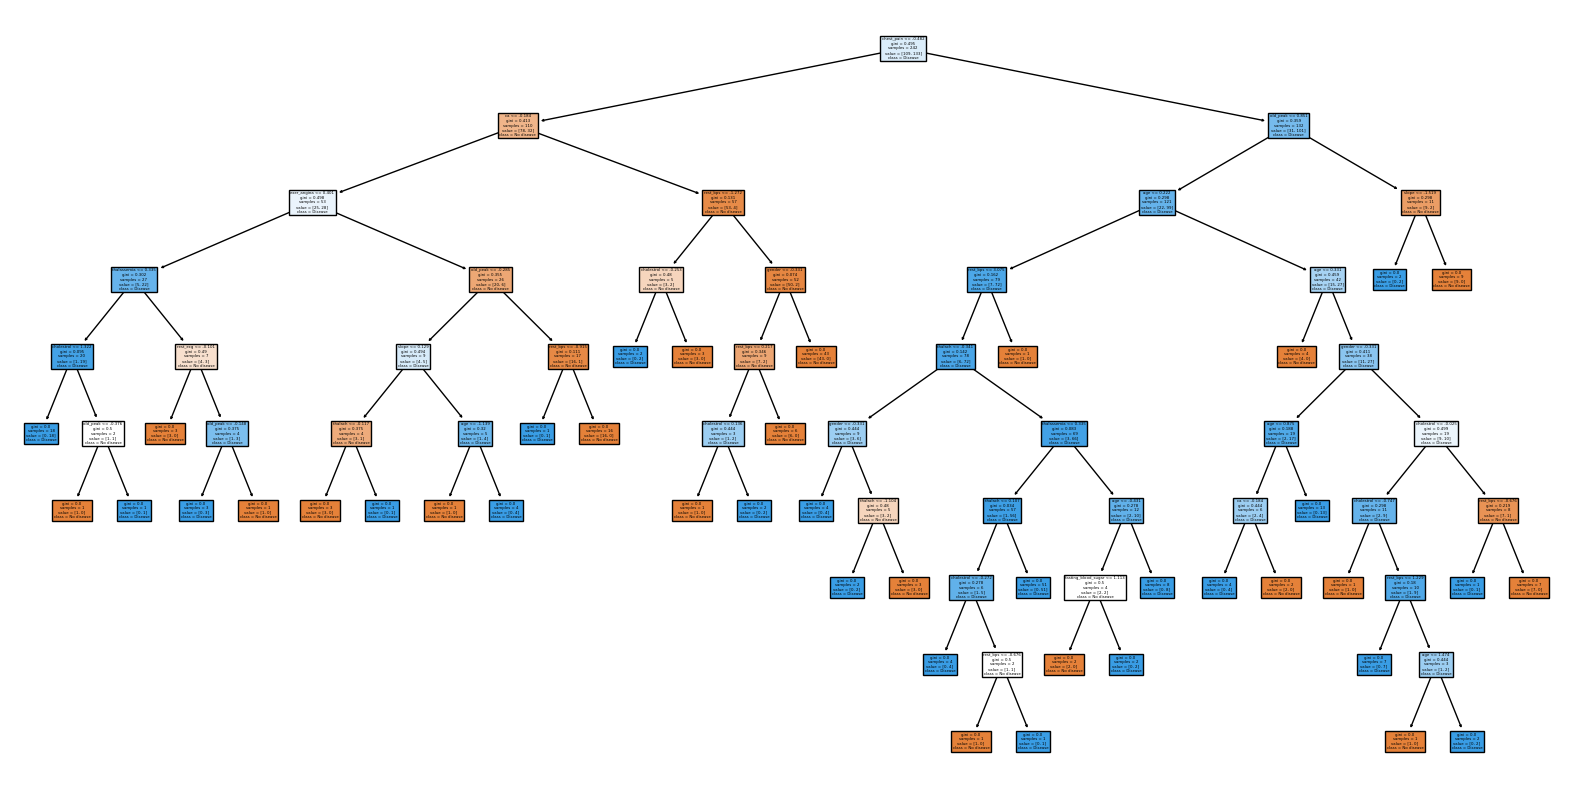

In [24]:
plt.figure(figsize=(20, 10))
tree.plot_tree(df_model, feature_names=X.columns, class_names = ['No disease', "Disease"], filled=True)
plt.show()

In [25]:
dt_model_2 = DecisionTreeClassifier(random_state=42, max_depth = 5, min_samples_split = 4, min_samples_leaf = 2)
dt_model_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=4,
                       random_state=42)

In [26]:
y_pred_2 = dt_model_2.predict(X_test)

In [31]:
accuracy_2 = accuracy_score(y_test, y_pred_2)
print("Tuned Accuracy:", accuracy_2)

Tuned Accuracy: 0.7868852459016393


In [32]:
conf_matrix_2 = confusion_matrix(y_test, y_pred_2)
print("Tuned Confusion Matrix:\n", conf_matrix_2)

Tuned Confusion Matrix:
 [[24  5]
 [ 8 24]]


In [33]:
class_report_2 = classification_report(y_test, y_pred_2)
print("Tuned Classification Report:\n", class_report_2)

Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.83      0.79        29
           1       0.83      0.75      0.79        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



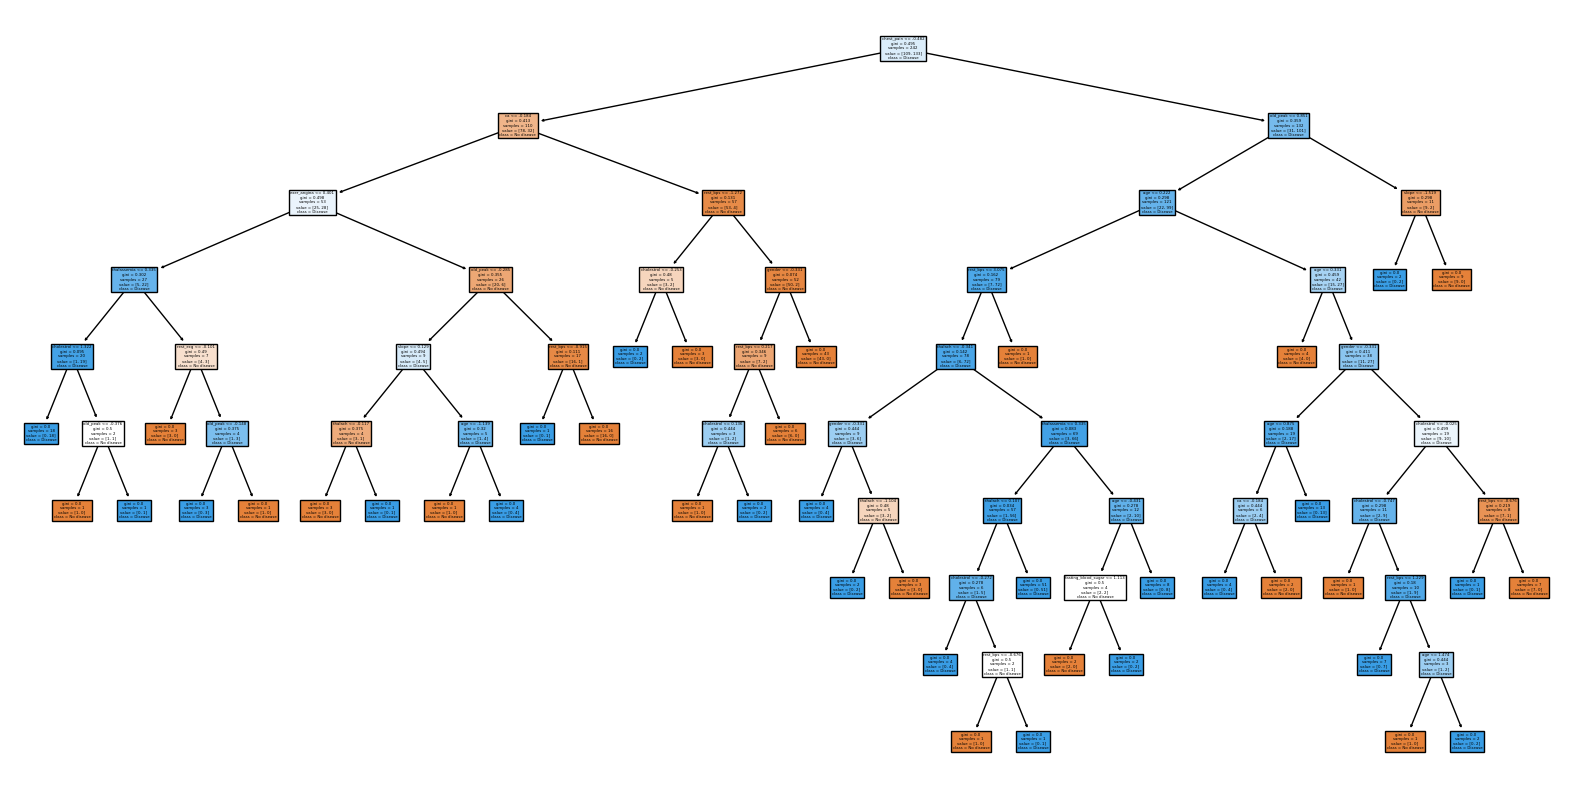

In [30]:
plt.figure(figsize=(20, 10))
tree.plot_tree(df_model, feature_names=X.columns, class_names = ['No disease', "Disease"], filled=True)
plt.show()